# 기말고사 (대체과제)
마감 : 12/22(일) 23:59
제출 : 학번.pdf(발표자료) + youtube 주소(발표영상), 증빙 자료(코드: github, 시연) : 필요한 경우

슬라이드 : 20장 이내(제목 포함)
발표 시간 7분 이내

- '대기오염 지표'라 함은 SO2(아황산가스), CO(일산화탄소), O3(오존), NO2(이산화질소), PM-10(미세먼지), PM-2.5(초미세먼지) 총 6가지를 의미한다.
'(대기)오염도'라 함은 대기오염 지표별 수치를 의미한다.
시각화 계획

[HeatMap] 2020년 한 해 동안의 시군구별 COVID19 확진자 수와 기온, 대기오염도, 인구수가 어떤 상관 관계를 가지는지 HeatMap을 통해 알아봄.
[Folium] 시군구별 2020년 1년간 각 대기오염 지표에 따른 오염도를 folium map으로 나타냄.

이후 분석한 자료들을 통해 '이동형 병원 설치 후보지 설정'에 대한 제안을 함.

In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2020년 대기오염지표 데이터
- 인구수, 기온, 대기오염지표 등 다양한 변수들과 전염병 확산의 상관관계를 알아보는 것이 목적이므로, COVID 19가 처음 유행하기 시작했던 2020년 통계 자료를 기준으로 함.
- 대기오염지표를 한 번에 불러오면 시간이 너무 오래 걸리므로 chunksize를 지정하여 파일을 불러오는 시간을 줄임.

In [2]:
# 월별 csv 데이터 불러오기
chunksize = 2000

file_path1 = '/content/drive/MyDrive/[빅데이터] 기말/1. 대기오염지표/2020csv/2020년 1월.csv'
file_path2 = '/content/drive/MyDrive/[빅데이터] 기말/1. 대기오염지표/2020csv/2020년 2월.csv'
file_path3 = '/content/drive/MyDrive/[빅데이터] 기말/1. 대기오염지표/2020csv/2020년 3월.csv'
file_path4 = '/content/drive/MyDrive/[빅데이터] 기말/1. 대기오염지표/2020csv/2020년 4월.csv'
file_path5 = '/content/drive/MyDrive/[빅데이터] 기말/1. 대기오염지표/2020csv/2020년 5월.csv'
file_path6 = '/content/drive/MyDrive/[빅데이터] 기말/1. 대기오염지표/2020csv/2020년 6월.csv'
file_path7 = '/content/drive/MyDrive/[빅데이터] 기말/1. 대기오염지표/2020csv/2020년 7월.csv'
file_path8 = '/content/drive/MyDrive/[빅데이터] 기말/1. 대기오염지표/2020csv/2020년 8월.csv'
file_path9 = '/content/drive/MyDrive/[빅데이터] 기말/1. 대기오염지표/2020csv/2020년 9월.csv'
file_path10 = '/content/drive/MyDrive/[빅데이터] 기말/1. 대기오염지표/2020csv/2020년 10월.csv'
file_path11 = '/content/drive/MyDrive/[빅데이터] 기말/1. 대기오염지표/2020csv/2020년 11월.csv'
file_path12 = '/content/drive/MyDrive/[빅데이터] 기말/1. 대기오염지표/2020csv/2020년 12월.csv'

# 월별 파일 읽기
df1= pd.read_csv(file_path1, chunksize = chunksize, encoding="cp949")
df2= pd.read_csv(file_path2, chunksize = chunksize, encoding="cp949")
df3= pd.read_csv(file_path3, chunksize = chunksize, encoding="cp949")
df4= pd.read_csv(file_path4, chunksize = chunksize, encoding="cp949")
df5= pd.read_csv(file_path5, chunksize = chunksize, encoding="cp949")
df6= pd.read_csv(file_path6, chunksize = chunksize, encoding="cp949")
df7= pd.read_csv(file_path7, chunksize = chunksize, encoding="cp949")
df8= pd.read_csv(file_path8, chunksize = chunksize, encoding="cp949")
df9= pd.read_csv(file_path9, chunksize = chunksize, encoding="cp949")
df10= pd.read_csv(file_path10, chunksize = chunksize, encoding="cp949")
df11= pd.read_csv(file_path11, chunksize = chunksize, encoding="cp949")
df12= pd.read_csv(file_path12, chunksize = chunksize, encoding="cp949")

# 월별 파일 합치기
df1 = pd.concat(df1)
df2 = pd.concat(df2)
df3 = pd.concat(df3)
df4 = pd.concat(df4)
df5 = pd.concat(df5)
df6 = pd.concat(df6)
df7 = pd.concat(df7)
df8 = pd.concat(df8)
df9 = pd.concat(df9)
df10 = pd.concat(df10)
df11 = pd.concat(df11)
df12 = pd.concat(df12)

In [3]:
# 연간 통계치를 볼 예정이므로 모든 월을 합친 df 변수를 만듦.
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index=True)
df

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2020010101,0.0030,0.5,0.002,0.0360,24.0,19.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2020010102,0.0030,0.6,0.001,0.0390,25.0,21.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2020010103,0.0030,0.9,0.001,0.0370,29.0,23.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2020010104,0.0020,0.6,0.001,0.0360,26.0,22.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2020010105,0.0020,0.6,0.001,0.0350,25.0,19.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...,...
4619613,인천 옹진군,국가배경농도,831495,울도,2020123120,0.0025,0.3,NaN,0.0029,33.0,13.0,인천 옹진군 덕적면 울도리 85번지
4619614,인천 옹진군,국가배경농도,831495,울도,2020123121,0.0024,0.3,NaN,0.0028,27.0,14.0,인천 옹진군 덕적면 울도리 85번지
4619615,인천 옹진군,국가배경농도,831495,울도,2020123122,0.0023,0.3,NaN,0.0030,25.0,10.0,인천 옹진군 덕적면 울도리 85번지
4619616,인천 옹진군,국가배경농도,831495,울도,2020123123,0.0023,0.2,NaN,0.0025,22.0,13.0,인천 옹진군 덕적면 울도리 85번지


- 지역 분류 코드 가져오기

In [4]:
# 행정구역별 코드 가져오기
code_file_path = '/content/drive/MyDrive/[빅데이터] 기말/행정구역별 코드.csv'
code_df= pd.read_csv(code_file_path, encoding = 'euc-kr')
code_df.columns = ['code-sgg']
code_df[['code', 'sgg']] = code_df['code-sgg'].str.split(' ', expand=True)
code_df = code_df.drop(columns = ['code-sgg'])

# 전처리 (시군구 행정코드라서 시도별로 표기되어 있는 경우는 수정)
code_df.loc[code_df['sgg'] == "용인시", 'code'] = 41461
code_df.loc[code_df['sgg'] == "전주시", 'code'] = 52111
code_df.loc[code_df['sgg'] == "포항시", 'code'] = 47111
code_df.loc[code_df['sgg'] == "청주시", 'code'] = 43111
code_df.loc[code_df['sgg'] == "고양시", 'code'] = 41281
code_df.loc[code_df['sgg'] == "창원시", 'code'] = 48121
code_df.loc[code_df['sgg'] == "천안시", 'code'] = 44131
code_df.loc[code_df['sgg'] == "수원시", 'code'] = 41111
code_df.loc[code_df['sgg'] == "안산시", 'code'] = 41271
code_df.loc[code_df['sgg'] == "성남시", 'code'] = 41131
code_df.loc[code_df['sgg'] == "부천시", 'code'] = 41192
code_df.loc[code_df['sgg'] == "안양시", 'code'] = 41171
# 수영구는 측정값이 없음


print(code_df)

      code      sgg
0    11110      종로구
1    11140       중구
2    11170      용산구
3    11200      성동구
4    11215      광진구
..     ...      ...
286  48880      거창군
287  48890      합천군
288     50  제주특별자치도
289  50110      제주시
290  50130     서귀포시

[291 rows x 2 columns]


In [42]:
df = df.rename(columns = {'지역' : 'location'})
new_df = df[['location', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']]
new_df

,location,SO2,CO,O3,NO2,PM10,PM25
0,서울 중구,0.0030,0.5,0.002,0.0360,24.0,19.0
1,서울 중구,0.0030,0.6,0.001,0.0390,25.0,21.0
2,서울 중구,0.0030,0.9,0.001,0.0370,29.0,23.0
3,서울 중구,0.0020,0.6,0.001,0.0360,26.0,22.0
4,서울 중구,0.0020,0.6,0.001,0.0350,25.0,19.0
...,...,...,...,...,...,...,...
4619613,인천 옹진군,0.0025,0.3,NaN,0.0029,33.0,13.0
4619614,인천 옹진군,0.0024,0.3,NaN,0.0028,27.0,14.0
4619615,인천 옹진군,0.0023,0.3,NaN,0.0030,25.0,10.0
4619616,인천 옹진군,0.0023,0.2,NaN,0.0025,22.0,13.0


In [43]:
# 지역을 기준으로 평균 통계자료를 만듦.
avg_df = new_df.groupby(['location'], as_index=False).mean()
avg_df

,location,SO2,CO,O3,NO2,PM10,PM25
0,강원 강릉시,0.002497,0.448326,0.035717,0.011583,30.901885,14.099336
1,강원 고성군,0.001416,0.338682,0.037891,0.003502,27.103536,13.917367
2,강원 동해시,0.001988,0.399221,0.027125,0.013208,30.178801,14.907309
3,강원 삼척시,0.002476,0.345021,0.026837,0.011253,24.812222,12.878626
4,강원 속초시,0.003713,0.426826,0.035065,0.008944,31.563126,12.148879
...,...,...,...,...,...,...,...
224,충북 제천시,0.003201,0.519191,0.023198,0.015506,26.610233,17.617860
225,충북 증평군,0.002836,0.413733,0.026982,0.012509,39.624283,24.200760
226,충북 진천군,0.002980,0.444847,0.031794,0.013406,36.670479,22.337919
227,충북 청주시,0.003215,0.426503,0.026843,0.017828,37.143202,22.215691


In [9]:
# avg_df = avg_df.rename(columns = {'지역' : 'location'})
splited = avg_df['location'].str.split(' ', expand = True)
splited.columns = ['state', 'sgg']
new_df = pd.concat([avg_df, splited], axis=1)
new_df = new_df[['state', 'sgg', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']]

# 기온 통계에 나타나 있지 않은 것은 바꿔주기
new_df.loc[new_df['state'] == '광주', 'state'] = '전남'
new_df.loc[new_df['state'] == '대구', 'state'] = '경북'
new_df.loc[new_df['state'] == '부산', 'state'] = '경남'
new_df.loc[new_df['state'] == '울산', 'state'] = '경남'
new_df.loc[new_df['state'] == '세종', 'state'] = '충북'
new_df.loc[new_df['state'] == '인천', 'state'] = '경기'

# new_df.to_csv('hi.csv', encoding = 'euc-kr')
new_df

,state,sgg,SO2,CO,O3,NO2,PM10,PM25
0,강원,강릉시,0.002497,0.448326,0.035717,0.011583,30.901885,14.099336
1,강원,고성군,0.001416,0.338682,0.037891,0.003502,27.103536,13.917367
2,강원,동해시,0.001988,0.399221,0.027125,0.013208,30.178801,14.907309
3,강원,삼척시,0.002476,0.345021,0.026837,0.011253,24.812222,12.878626
4,강원,속초시,0.003713,0.426826,0.035065,0.008944,31.563126,12.148879
...,...,...,...,...,...,...,...,...
224,충북,제천시,0.003201,0.519191,0.023198,0.015506,26.610233,17.617860
225,충북,증평군,0.002836,0.413733,0.026982,0.012509,39.624283,24.200760
226,충북,진천군,0.002980,0.444847,0.031794,0.013406,36.670479,22.337919
227,충북,청주시,0.003215,0.426503,0.026843,0.017828,37.143202,22.215691


In [11]:
# left 혹은 inner 조인 후 drop_duplicates를 통해서 데이터가 늘어나는 것을 방지함.
code_merge_df = pd.merge(left = new_df, right = code_df, how='left', on='sgg')
code_merge_df = code_merge_df.drop_duplicates(subset='sgg', keep='first', inplace=False)
code_merge_df = code_merge_df.reset_index()
code_merge_df

,index,state,sgg,SO2,CO,O3,NO2,PM10,PM25,code
0,0,강원,강릉시,0.002497,0.448326,0.035717,0.011583,30.901885,14.099336,51150
1,1,강원,고성군,0.001416,0.338682,0.037891,0.003502,27.103536,13.917367,51820
2,3,강원,동해시,0.001988,0.399221,0.027125,0.013208,30.178801,14.907309,51170
3,4,강원,삼척시,0.002476,0.345021,0.026837,0.011253,24.812222,12.878626,51230
4,5,강원,속초시,0.003713,0.426826,0.035065,0.008944,31.563126,12.148879,51210
...,...,...,...,...,...,...,...,...,...,...
202,340,충북,제천시,0.003201,0.519191,0.023198,0.015506,26.610233,17.617860,43150
203,341,충북,증평군,0.002836,0.413733,0.026982,0.012509,39.624283,24.200760,43745
204,342,충북,진천군,0.002980,0.444847,0.031794,0.013406,36.670479,22.337919,43750
205,343,충북,청주시,0.003215,0.426503,0.026843,0.017828,37.143202,22.215691,43111


In [12]:
# 기온 데이터 불러오기
temp_file_path = '/content/drive/MyDrive/[빅데이터] 기말/4. 기온/기온.csv'
temp_df= pd.read_csv(temp_file_path, encoding = 'euc-kr')

# 20년 기온 데이터 가져오기
temp20_df = temp_df[temp_df['년'] == 2020].reset_index(drop = True)
# 서울경기 데이터 복사 붙여넣기
copied_row = temp20_df.loc[[0]]
temp20_df = pd.concat([temp20_df.iloc[:1], copied_row, temp20_df.iloc[1:]], ignore_index = True)
# 서울경기 이름 바꾸기
temp20_df.loc[0, '지점'] = '서울'
temp20_df.loc[1, '지점'] = '경기'


# 강원 데이터 합치기
avg_temp = (temp20_df.iloc[2, 2] + temp20_df.iloc[3, 2]) / 2
avg_max_temp = (temp20_df.iloc[2, 3] + temp20_df.iloc[3, 3]) / 2
avg_min_temp = (temp20_df.iloc[2, 4] + temp20_df.iloc[3, 4]) / 2
temp20_df.loc[2, '지점'] = '강원'
temp20_df.loc[2, '평균기온(℃)'] = avg_temp
temp20_df.loc[2, '평균최저기온(℃)'] = avg_max_temp
temp20_df.loc[2, '평균최고기온(℃)'] = avg_min_temp

# 밑에 자료는 drop
temp20_df = temp20_df.drop([3])

temp20_df = temp20_df.rename(columns = {'지점' : 'state'})


# 출력
temp20_df

,년,state,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
0,2020,서울,12.60,8.3,17.60
1,2020,경기,12.60,8.3,17.60
2,2020,강원,11.75,7.1,16.95
4,2020,충북,12.10,7.0,17.90
5,2020,충남,12.80,8.0,18.40
6,2020,경북,13.10,8.1,18.70
7,2020,경남,14.10,9.7,19.50
8,2020,전북,12.90,8.3,18.40
9,2020,전남,14.20,10.1,18.80
10,2020,제주,16.40,13.5,19.60


In [13]:
merge_df = pd.merge(left = temp20_df, right = code_merge_df,  how='inner', on='state')
merge_df = merge_df.drop_duplicates(subset='sgg', keep='first', inplace=False)
merge_df = merge_df.reset_index(level=None)
merge_df = merge_df.drop(['level_0'], axis=1)
merge_df = merge_df.drop(['index'], axis=1)

merge_df

,년,state,평균기온(℃),평균최저기온(℃),평균최고기온(℃),sgg,SO2,CO,O3,NO2,PM10,PM25,code
0,2020,서울,12.6,8.3,17.6,강남구,0.002977,0.588853,0.023000,0.028135,34.800674,20.515414,11680
1,2020,서울,12.6,8.3,17.6,강동구,0.003254,0.511552,0.021606,0.029760,38.836443,22.052598,11740
2,2020,서울,12.6,8.3,17.6,강북구,0.002646,0.446590,0.024193,0.019735,38.259591,21.323366,11305
3,2020,서울,12.6,8.3,17.6,관악구,0.003132,0.514548,0.024534,0.027887,34.889783,19.159812,11620
4,2020,서울,12.6,8.3,17.6,광진구,0.002934,0.557786,0.024226,0.020116,33.992483,19.808289,11215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2020,전남,14.2,10.1,18.8,함평군,0.001941,0.523554,0.024908,0.007336,30.818632,17.895485,46860
201,2020,전남,14.2,10.1,18.8,해남군,0.003290,0.352148,0.036614,0.008954,28.936544,16.206569,46820
202,2020,전남,14.2,10.1,18.8,화순군,0.002382,0.401306,0.029780,0.006804,26.098050,14.027219,46790
203,2020,제주,16.4,13.5,19.6,서귀포시,0.001247,0.257421,0.041208,0.006083,29.202945,15.365758,50130


In [16]:
# 확진자 수 csv
covid_file_path = '/content/drive/MyDrive/[빅데이터] 기말/3. 확진자수/확진자수2020.csv'
covid_df= pd.read_csv(covid_file_path, encoding = 'euc-kr')

covid20_df = covid_df[['시도명', '시군구', '2020년']]
# 합계 자료는 drop
idx = covid20_df[covid20_df['시군구'] == '합계'].index
covid20_df.drop(idx, inplace = True)

covid20_df = covid20_df.rename(columns = {'시군구' : 'sgg'})
covid20_df = covid20_df.rename(columns = {'2020년' : '확진자수'})

covid20_df[['확진자수']] = covid20_df[['확진자수']].apply(pd.to_numeric)

# covid_df.dtypes

covid20_df = covid20_df.drop(['시도명'], axis=1)
covid20_df

,sgg,확진자수
1,강남구,1112
2,강동구,613
3,강북구,394
4,강서구,1341
5,관악구,975
...,...,...
262,함안군,6
263,함양군,7
264,합천군,20
266,서귀포시,70


In [17]:
# covid20_df = covid20_df.rename(columns = {'시군구' : 'sgg'})
covid_merge_df = pd.merge(left = merge_df, right = covid20_df, how='inner', on='sgg')
covid_merge_df = covid_merge_df.drop_duplicates(subset='sgg', keep='first', inplace=False)
covid_merge_df = covid_merge_df.reset_index()
covid_merge_df

,index,년,state,평균기온(℃),평균최저기온(℃),평균최고기온(℃),sgg,SO2,CO,O3,NO2,PM10,PM25,code,확진자수
0,0,2020,서울,12.6,8.3,17.6,강남구,0.002977,0.588853,0.023000,0.028135,34.800674,20.515414,11680,1112
1,1,2020,서울,12.6,8.3,17.6,강동구,0.003254,0.511552,0.021606,0.029760,38.836443,22.052598,11740,613
2,2,2020,서울,12.6,8.3,17.6,강북구,0.002646,0.446590,0.024193,0.019735,38.259591,21.323366,11305,394
3,3,2020,서울,12.6,8.3,17.6,관악구,0.003132,0.514548,0.024534,0.027887,34.889783,19.159812,11620,975
4,4,2020,서울,12.6,8.3,17.6,광진구,0.002934,0.557786,0.024226,0.020116,33.992483,19.808289,11215,458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,211,2020,전남,14.2,10.1,18.8,함평군,0.001941,0.523554,0.024908,0.007336,30.818632,17.895485,46860,11
189,212,2020,전남,14.2,10.1,18.8,해남군,0.003290,0.352148,0.036614,0.008954,28.936544,16.206569,46820,3
190,213,2020,전남,14.2,10.1,18.8,화순군,0.002382,0.401306,0.029780,0.006804,26.098050,14.027219,46790,39
191,214,2020,제주,16.4,13.5,19.6,서귀포시,0.001247,0.257421,0.041208,0.006083,29.202945,15.365758,50130,70


In [18]:
# 인구통계 csv
pop_file_path = '/content/drive/MyDrive/[빅데이터] 기말/2. 인구통계/2020 인구.csv'
pop_df= pd.read_csv(pop_file_path, thousands = ',', encoding = 'euc-kr')
pop_df = pop_df[['행정구역', '2020년12월_총인구수']]
pop_df = pop_df.rename(columns = {'2020년12월_총인구수' : '총인구수'})

pop_splited = pop_df['행정구역'].str.split(' ', expand = True)
pop_splited.columns = ['state', 'sgg', 'num', 'else']
new_pop_df = pd.concat([pop_df, pop_splited], axis=1)
new_pop_df = new_pop_df[['sgg', '총인구수']]

new_pop_df
# covid20_df = covid_df[['시도명', '시군구', '2020년']]
# # 합계 자료는 drop
# idx = covid20_df[covid20_df['시군구'] == '합계'].index
# covid20_df.drop(idx, inplace = True)

# covid20_df = covid20_df.rename(columns = {'시군구' : 'sgg'})
# covid20_df = covid20_df.rename(columns = {'2020년' : '확진자수'})
# covid20_df = covid20_df.drop(['시도명'], axis=1)
# covid20_df



,sgg,총인구수
0,,9668465
1,종로구,149384
2,중구,125240
3,용산구,230040
4,성동구,293556
...,...,...
285,거창군,61502
286,합천군,44006
287,,674635
288,제주시,492466


In [19]:
total_merge_df = pd.merge(left = covid_merge_df, right = new_pop_df, how='left', on='sgg')
total_merge_df = total_merge_df.drop_duplicates(subset='sgg', keep='first', inplace=False)
total_merge_df = total_merge_df.reset_index()
total_merge_df = total_merge_df.drop(['level_0', 'index'], axis=1)
total_merge_df

total_merge_df = total_merge_df.rename(columns = {'평균기온(℃)' : 'avg_temp'})
total_merge_df = total_merge_df.rename(columns = {'평균최저기온(℃)' : 'avg_min_temp'})
total_merge_df = total_merge_df.rename(columns = {'평균최고기온(℃)' : 'avg_max_temp'})
total_merge_df = total_merge_df.rename(columns = {'확진자수' : 'confirmed_case'})
total_merge_df = total_merge_df.rename(columns = {'총인구수' : 'total_population'})

total_merge_df


# total_merge_df[['확진자수', '총인구수']] = total_merge_df[['확진자수', '총인구수']].apply(pd.to_numeric)

,년,state,avg_temp,avg_min_temp,avg_max_temp,sgg,SO2,CO,O3,NO2,PM10,PM25,code,confirmed_case,total_population
0,2020,서울,12.6,8.3,17.6,강남구,0.002977,0.588853,0.023000,0.028135,34.800674,20.515414,11680,1112,539231
1,2020,서울,12.6,8.3,17.6,강동구,0.003254,0.511552,0.021606,0.029760,38.836443,22.052598,11740,613,459970
2,2020,서울,12.6,8.3,17.6,강북구,0.002646,0.446590,0.024193,0.019735,38.259591,21.323366,11305,394,308055
3,2020,서울,12.6,8.3,17.6,관악구,0.003132,0.514548,0.024534,0.027887,34.889783,19.159812,11620,975,495060
4,2020,서울,12.6,8.3,17.6,광진구,0.002934,0.557786,0.024226,0.020116,33.992483,19.808289,11215,458,346682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2020,전남,14.2,10.1,18.8,함평군,0.001941,0.523554,0.024908,0.007336,30.818632,17.895485,46860,11,32050
189,2020,전남,14.2,10.1,18.8,해남군,0.003290,0.352148,0.036614,0.008954,28.936544,16.206569,46820,3,68806
190,2020,전남,14.2,10.1,18.8,화순군,0.002382,0.401306,0.029780,0.006804,26.098050,14.027219,46790,39,62522
191,2020,제주,16.4,13.5,19.6,서귀포시,0.001247,0.257421,0.041208,0.006083,29.202945,15.365758,50130,70,182169


[Text(0.5, 1.0, 'Correlation between the number of confirmed cases and numeric variables')]

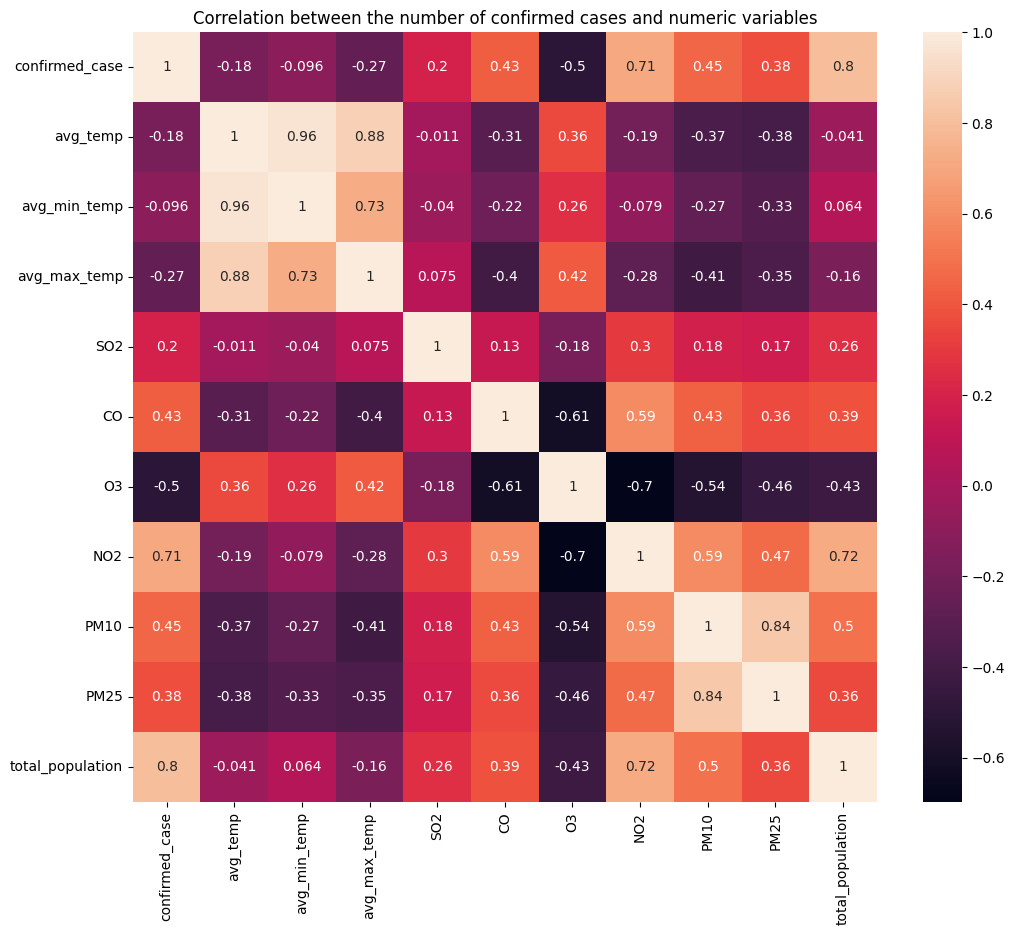

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 확진자수와 수치형 변수들 간의 상관 관계를 나타낸 히트맵
# corrMat = total_merge_df[['확진자수', '평균최저기온(℃)', '평균기온(℃)']].corr()

corrMat = total_merge_df[['confirmed_case', 'avg_temp', 'avg_min_temp', 'avg_max_temp', 'SO2', 'CO', 'O3',  'NO2', 'PM10', 'PM25', 'total_population']].corr()
fig, ax=plt.subplots()
fig.set_size_inches(12, 10)
sns.heatmap(corrMat, annot=True)
ax.set(title='Correlation between the number of confirmed cases and numeric variables')

## 결과 분석
- 확진자 수(confirmed_case)와 그 외 다양한 수치들의 상관관계를 나타내는 히트맵을 통해, 어떤 수치가 확진자 수와 관련이 있는지를 알아볼 수 있다.
- 인구 수가 0.8로 가장 연관도가 높으나, 이는 상식 선에서 인구 수가 늘어날 수록 확진자가 늘어단다는 사실이 분명하다는 것을 알 수 있으므로 인구 수로는 특별한 사실을 알 수 없다.
- 평균 기온, 평균 최저기온, 평균 최고기온은 모두 확진자 수에 영향을 거의 주지 않을 만큼 미미한 결과를 보였다.
- 주목해볼 것은 대기오염지표들 중 CO, NO2, PM10이다. 이들은 상관관계 수치가 각각 0.43, 0.71, 0.45으로 상당히 높은 관련성을 보였다. 특히 인구수가 0.8의 수치를 가진다는 것을 고려했을 때 NO2가 0.71의 수치를 보인다는 것은 흥미로운 결과다. 또한 PM10보다는 그 수치가 낮지만 0.38의 관련성을 가지는 PM25도 주목할 필요가 있다.
- 우리는 이를 통해 CO, NO2, PM10의 수치와 전염병 확진자수가 관련이 있다는 것을 알 수 있다. 따라서 국가재난대비책으로 해당 3 지표의 수치가 높은 지역에 이동형 병원을 설치한다면 재난 시에도 빠른 대비가 가능할 것이다.

### Folium Map
- 지금부터는 CO, NO2, PM10이 높은 지역이 어디인지 Folium Map을 통해 시각화해 알아본다.

In [44]:
# 순서대로 CO(일산화탄소), NO2(이산화질소), PM-10(미세먼지) 데이터 프레임
splited = avg_df['location'].str.split(' ', expand = True)
splited.columns = ['state', 'sgg']
avg_df = pd.concat([avg_df, splited], axis=1)

CO_df = avg_df[['sgg', 'CO']]
NO2_df = avg_df[['sgg', 'NO2']]
PM10_df = avg_df[['sgg', 'PM10']]

CO_df

,sgg,CO
0,강릉시,0.448326
1,고성군,0.338682
2,동해시,0.399221
3,삼척시,0.345021
4,속초시,0.426826
...,...,...
224,제천시,0.519191
225,증평군,0.413733
226,진천군,0.444847
227,청주시,0.426503


In [45]:
CO_code_df = pd.merge(left = CO_df, right = code_df, how='left', on='sgg')
NO2_code_df = pd.merge(left = NO2_df, right = code_df, how='left', on='sgg')
PM10_code_df = pd.merge(left = PM10_df, right = code_df, how='left', on='sgg')

CO_code_df = CO_code_df[['code', 'CO', 'sgg']]
NO2_code_df = NO2_code_df[['code', 'NO2', 'sgg']]
PM10_code_df = PM10_code_df[['code', 'PM10', 'sgg']]

In [46]:
code_lst = ['52113', '48123', '48125', '48127', '48129', '44133', '43112', '43113', '43114', '41113', '41115', '41117', '41273', '41133', '41135', '41194', '41196', '41173', '41285', '41287', '41463', '41465']
sgg_lst = ['전주시', '창원시', '창원시', '창원시', '창원시', '천안시', '청주시', '청주시', '청주시', '수원시', '수원시', '수원시', '안산시', '성남시', '성남시', '부천시', '부천시', '안양시', '고양시', '고양시', '용인시', '용인시']

# 오염도 지표별 추가 항목 리스트
CO_lst = []
NO2_lst = []
PM10_lst = []


# CO
for si in sgg_lst:
  CO_lst.append(round(CO_code_df[CO_code_df['sgg'].str.contains(si)]['CO'].mean(), 6))

CO_dict = {'code' : code_lst, 'CO' : CO_lst, 'sgg' : sgg_lst}
add_CO_df = pd.DataFrame(CO_dict)

CO_merge_df = pd.concat([CO_code_df, add_CO_df], ignore_index=True)



# NO2
for si in sgg_lst:
  NO2_lst.append(round(NO2_code_df[NO2_code_df['sgg'].str.contains(si)]['NO2'].mean(), 6))

NO2_dict = {'code' : code_lst, 'NO2' : NO2_lst, 'sgg' : sgg_lst}
add_NO2_df = pd.DataFrame(NO2_dict)

NO2_merge_df = pd.concat([NO2_code_df, add_NO2_df], ignore_index=True)



# PM10
for si in sgg_lst:
  PM10_lst.append(round(PM10_code_df[PM10_code_df['sgg'].str.contains(si)]['PM10'].mean(), 6))

PM10_dict = {'code' : code_lst, 'PM10' : PM10_lst, 'sgg' : sgg_lst}
add_PM10_df = pd.DataFrame(PM10_dict)

PM10_merge_df = pd.concat([PM10_code_df, add_PM10_df], ignore_index=True)

# CO

In [47]:
# json 지도 파일 불러오기
state_geo = '/content/drive/MyDrive/[빅데이터] 기말/시군구2024/sig_wgs84.json'

m = folium.Map(location=(36, 127), tiles="OpenStreetMap", zoom_start=7, width = 500, height = 500)
folium.Choropleth(
    geo_data = state_geo,
    name='CO',
    data = CO_merge_df,
    columns = ['code','CO'],
    key_on = 'feature.properties.SIG_CD',
    fill_color = 'YlGn',
    fill_opacity = 0.7,
    line_opacity = 0.3,
    color = 'gray',
    legend_name = 'CO'
).add_to(m)

# folium.LayerControl().add_to(m)
m

# NO2

In [48]:
# json 지도 파일 불러오기
state_geo = '/content/drive/MyDrive/[빅데이터] 기말/시군구2024/sig_wgs84.json'

m = folium.Map(location=(36, 127), tiles="OpenStreetMap", zoom_start=7, width = 500, height = 500)
folium.Choropleth(
    geo_data = state_geo,
    name='NO2',
    data = NO2_merge_df,
    columns = ['code','NO2'],
    key_on = 'feature.properties.SIG_CD',
    fill_color = 'YlGn',
    fill_opacity = 0.7,
    line_opacity = 0.3,
    color = 'gray',
    legend_name = 'NO2'
).add_to(m)

# folium.LayerControl().add_to(m)
m

#PM10

In [49]:
# json 지도 파일 불러오기
state_geo = '/content/drive/MyDrive/[빅데이터] 기말/시군구2024/sig_wgs84.json'

m = folium.Map(location=(36, 127), tiles="OpenStreetMap", zoom_start=7, width = 500, height = 500)
folium.Choropleth(
    geo_data = state_geo,
    name='PM10',
    data = PM10_merge_df,
    columns = ['code','PM10'],
    key_on = 'feature.properties.SIG_CD',
    fill_color = 'YlGn',
    fill_opacity = 0.7,
    line_opacity = 0.3,
    color = 'gray',
    legend_name = 'PM10'
).add_to(m)

# folium.LayerControl().add_to(m)
m

In [54]:
print(avg_df[avg_df['CO'] == avg_df.max()['CO']])
print("\n")
print(avg_df[avg_df['NO2'] == avg_df.max()['NO2']])
print("\n")
print(avg_df[avg_df['PM10'] == avg_df.max()['PM10']])


    location       SO2        CO     O3       NO2       PM10       PM25 state  \
124   서울 강남구  0.002977  0.588853  0.023  0.028135  34.800674  20.515414    서울   

     sgg  
124  강남구  


    location       SO2        CO        O3       NO2      PM10      PM25  \
135   서울 동작구  0.003394  0.482661  0.021403  0.032465  40.63821  22.05715   

    state  sgg  
135    서울  동작구  


    location       SO2        CO        O3       NO2       PM10       PM25  \
207   충남 당진시  0.004433  0.483738  0.033025  0.014957  44.627675  25.025319   

    state  sgg  
207    충남  당진시  


#Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean dictum ultricies nulla, tempor ultricies ipsum tempor id. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Duis rutrum tempus auctor. Maecenas dignissim ex sed magna molestie, vitae rutrum neque scelerisque. Praesent metus mauris, malesuada id euismod a, consequat at ipsum. Mauris quis diam vel risus varius luctus. Ut sit amet enim maximus, eleifend urna a, sagittis turpis. Nam maximus sapien ac orci tristique elementum vitae eu turpis.

#Cras hendrerit ac tortor et malesuada. Quisque vitae nunc sed ex vestibulum euismod. Curabitur faucibus pellentesque metus, eu pellentesque magna dignissim ut. Maecenas ac eros id lacus imperdiet tempus. Praesent maximus sodales metus sit amet fringilla. Praesent et semper odio. Fusce eu aliquet quam. Sed eros tortor, ornare luctus justo eget, volutpat sagittis nunc. Sed aliquam placerat odio, in suscipit ligula pulvinar ut. Mauris luctus pulvinar accumsan. Proin commodo, quam non vehicula ultrices, libero nisi maximus nulla, vel lacinia urna ipsum non leo. Fusce finibus aliquet lacus, quis laoreet ante consectetur commodo. Sed imperdiet aliquet est ut commodo.

#Vivamus sit amet quam sit amet libero viverra pharetra. Nunc felis orci, sodales id sodales ut, hendrerit vitae nibh. Donec elit leo, pharetra sit amet placerat sed, iaculis in tortor. Phasellus lacinia vel nunc ac facilisis. Nam est sem, gravida et ligula interdum, tristique lobortis est. Curabitur sodales metus sit amet vehicula tincidunt. Donec magna tellus, mattis vitae euismod eu, cursus et libero. Aliquam eros est, consequat non ante eleifend, ornare accumsan diam. Maecenas fringilla felis elementum auctor facilisis.

#In ut sodales diam. Mauris libero mi, placerat at ipsum et, finibus tincidunt leo. Quisque lacinia lectus vitae odio convallis, nec finibus sapien pulvinar. Sed elit nibh, maximus id lectus ullamcorper, porttitor imperdiet neque. Morbi lacus nulla, feugiat vel sodales sed, aliquam eget quam. Ut quis nunc vitae erat elementum dignissim vestibulum et nunc. Aenean feugiat sem a sem imperdiet venenatis. Nam sed massa purus. Curabitur venenatis, dui sed porta elementum, est enim pellentesque felis, mattis dictum ante justo sit amet erat. In a hendrerit justo, nec pretium velit. Donec ac mi neque. Ut eget odio ac quam maximus aliquet nec eget nibh.

#Aliquam viverra facilisis justo, quis ultrices nisl euismod sed. Praesent accumsan lobortis lorem at posuere. Nam non sapien placerat, auctor sapien vitae, tempus purus. Aliquam commodo vestibulum augue, et venenatis purus. Fusce hendrerit leo et pretium tristique. Mauris vitae eros at odio venenatis consectetur. Ut ullamcorper velit vel justo interdum, at rutrum nunc euismod. Proin sagittis est non massa dictum blandit. Suspendisse in cursus felis. Nullam id laoreet ligula.

#Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean dictum ultricies nulla, tempor ultricies ipsum tempor id. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Duis rutrum tempus auctor. Maecenas dignissim ex sed magna molestie, vitae rutrum neque scelerisque. Praesent metus mauris, malesuada id euismod a, consequat at ipsum. Mauris quis diam vel risus varius luctus. Ut sit amet enim maximus, eleifend urna a, sagittis turpis. Nam maximus sapien ac orci tristique elementum vitae eu turpis.

#Cras hendrerit ac tortor et malesuada. Quisque vitae nunc sed ex vestibulum euismod. Curabitur faucibus pellentesque metus, eu pellentesque magna dignissim ut. Maecenas ac eros id lacus imperdiet tempus. Praesent maximus sodales metus sit amet fringilla. Praesent et semper odio. Fusce eu aliquet quam. Sed eros tortor, ornare luctus justo eget, volutpat sagittis nunc. Sed aliquam placerat odio, in suscipit ligula pulvinar ut. Mauris luctus pulvinar accumsan. Proin commodo, quam non vehicula ultrices, libero nisi maximus nulla, vel lacinia urna ipsum non leo. Fusce finibus aliquet lacus, quis laoreet ante consectetur commodo. Sed imperdiet aliquet est ut commodo.

#Vivamus sit amet quam sit amet libero viverra pharetra. Nunc felis orci, sodales id sodales ut, hendrerit vitae nibh. Donec elit leo, pharetra sit amet placerat sed, iaculis in tortor. Phasellus lacinia vel nunc ac facilisis. Nam est sem, gravida et ligula interdum, tristique lobortis est. Curabitur sodales metus sit amet vehicula tincidunt. Donec magna tellus, mattis vitae euismod eu, cursus et libero. Aliquam eros est, consequat non ante eleifend, ornare accumsan diam. Maecenas fringilla felis elementum auctor facilisis.

#In ut sodales diam. Mauris libero mi, placerat at ipsum et, finibus tincidunt leo. Quisque lacinia lectus vitae odio convallis, nec finibus sapien pulvinar. Sed elit nibh, maximus id lectus ullamcorper, porttitor imperdiet neque. Morbi lacus nulla, feugiat vel sodales sed, aliquam eget quam. Ut quis nunc vitae erat elementum dignissim vestibulum et nunc. Aenean feugiat sem a sem imperdiet venenatis. Nam sed massa purus. Curabitur venenatis, dui sed porta elementum, est enim pellentesque felis, mattis dictum ante justo sit amet erat. In a hendrerit justo, nec pretium velit. Donec ac mi neque. Ut eget odio ac quam maximus aliquet nec eget nibh.

#Aliquam viverra facilisis justo, quis ultrices nisl euismod sed. Praesent accumsan lobortis lorem at posuere. Nam non sapien placerat, auctor sapien vitae, tempus purus. Aliquam commodo vestibulum augue, et venenatis purus. Fusce hendrerit leo et pretium tristique. Mauris vitae eros at odio venenatis consectetur. Ut ullamcorper velit vel justo interdum, at rutrum nunc euismod. Proin sagittis est non massa dictum blandit. Suspendisse in cursus felis. Nullam id laoreet ligula.